In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture



In [2]:
sigmas = [0.5, 1, 2, 4, 8]
n_points = 100

centera = np.array([-1,-1])
centerb = np.array([1,-1])
centerc = np.array([0,1])

cluster_centers = np.concatenate([[centera], [centerb], [centerc]])

labels = np.array([0]*n_points + [1]*n_points +[2]*n_points )

In [3]:
def get_data(sigma):
    xa = np.random.multivariate_normal(centera, sigma*np.array([[2, 0.5], [0.5, 1]]), n_points)
    xb = np.random.multivariate_normal(centerb, sigma*np.array([[1, -0.5], [-0.5, 2]]), n_points)
    xc = np.random.multivariate_normal(centerc, sigma*np.array([[1, 0], [0, 2]]), n_points)

    X = np.concatenate([xa, xb, xc])
    
    return X

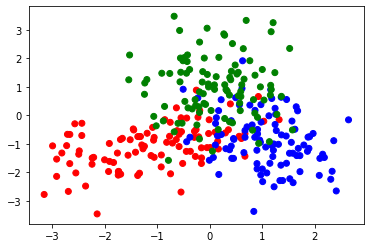

In [4]:
X = get_data(0.5)
mapi = {0:'r', 1:'b', 2:'g'}
plt.scatter(X[:, 0], X[:, 1], c=[mapi[i] for i in labels])
plt.show();

In [5]:
def get_metrics(labels, predicted_labels, predicted_centers, X):  
    acc = (labels == predicted_labels).sum()/300
    
    obj_f = 0
    for yi, xi in zip(predicted_labels, X):
        obj_f += np.linalg.norm(predicted_centers[yi] - xi)**2
    return acc, obj_f
     

In [6]:
def pick_correct_label(pred_clusters, pred_labels):
    ordered_pred_cc = []
    ordered_pred_labels = []
    label_map = {}
    for cc_i, cc in enumerate(cluster_centers):
        label_i = np.argmin(abs(cc - pred_clusters).sum(axis=1))
        ordered_pred_cc.append(pred_clusters[label_i])
        label_map[label_i] = cc_i
    try: 
        ordered_pred_labels = [label_map[i] for i in pred_labels]
    except KeyError:
        ordered_pred_labels = [0]*300
    return ordered_pred_cc, ordered_pred_labels

In [7]:
def get_objective_n_cluester_acc(model_name):

    obj_f_s = []
    acc_s = []

    for sigma in sigmas:

        best_obj_f = np.inf
        best_acc = np.inf
        for _ in range(5):
            X = get_data(sigma)

            if model_name == 'kmeans':
                kmeans = KMeans(n_clusters=3).fit(X)
                ordered_pred_cc, ordered_pred_labels = pick_correct_label(kmeans.cluster_centers_, kmeans.labels_)
                
            elif model_name == 'gm':
                gm = GaussianMixture(n_components=3).fit(X)
                ordered_pred_cc, ordered_pred_labels = pick_correct_label(gm.means_, gm.predict(X))
                
            else:
                raise 'Not model provided please type model_name=kmeans or model_name=gm'
                

            acc, obj_f = get_metrics(labels, ordered_pred_labels, ordered_pred_cc, X)
                
            if obj_f < best_obj_f:
                best_obj_f = obj_f
                best_acc = acc
                
        
        obj_f_s.append(best_obj_f)
        acc_s.append(best_acc)
        
    return obj_f_s, acc_s

In [8]:
k_obj_f_s, k_acc_s = get_objective_n_cluester_acc('kmeans')
gm_obj_f_s, gm_acc_s = get_objective_n_cluester_acc('gm')

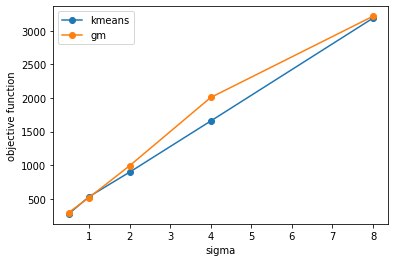

In [9]:
plt.plot(sigmas, k_obj_f_s, marker='o', label = 'kmeans')
plt.plot(sigmas, gm_obj_f_s, marker='o', label = 'gm')
plt.xlabel('sigma')
plt.ylabel('objective function')
plt.legend()
plt.savefig('images/knn_objective.jpg')
plt.show();

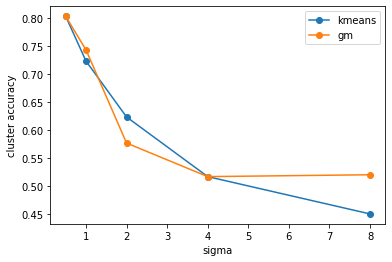

In [10]:
plt.plot(sigmas, k_acc_s, marker='o', label = 'kmeans')
plt.plot(sigmas, gm_acc_s, marker='o', label = 'gm')
plt.xlabel('sigma')
plt.ylabel('cluster accuracy')
plt.legend()
plt.savefig('images/knn_accuracy.jpg')
plt.show();

